## Resolución de Ecuaciones Diferenciales con Python

### 1.Ecuación logistica
$$\frac{dp}{dt}=ap-bp^2, \quad p(0)=p_0$$ 


Primero importamos las librerias a utilizar:

In [1]:
import sympy as sp #Libreria calculo simbolico
import matplotlib.pyplot as plt #Libreria para graficas
import matplotlib as mpl
import numpy as np #Liberia para calculos numericos
import scipy  #libreria para herramientas adicionales, 
               #estadistica, optimizacion, etc
sp.init_printing() #LIbreria para visualizar las ecuaciones

In [2]:
#Agregamos las variables que se encuentran en la ED
p=sp.Function('p') #variable dependiente de la función
t=sp.symbols('t')  #variable independiente de la función
a=sp.symbols('a')  #variables extras
b=sp.symbols('b')
p0=sp.symbols('p0')

In [3]:
ode=sp.Eq(sp.Derivative(p(t),t)-a*p(t)+b*p(t)*p(t),0) #comando para escribir la ED
sol = sp.dsolve(ode,p(t),ics={p(0):p0}) #Resolver la ED con el valor inicial p(0)=0

Documentación.
$$sol = sp.dsolve(ode, p(t), ics={p(0): p0})$$
Función: sp.dsolve resuelve ecuaciones diferenciales ordinarias (ODEs) de forma simbólica.

Argumentos:
$ode:$ Es la ecuación diferencial que se desea resolver. Puede estar expresada en términos simbólicos usando SymPy.

$p(t):$ La función desconocida que se está resolviendo, en este caso, una función de tiempo p(t).

$ics={p(0): p0}:$ Este es un diccionario que define las condiciones iniciales de la solución, donde p(0) es el valor de p en $t=0$ y $p0$ es el valor específico.

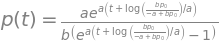

In [4]:
sol #imprimimos el resultado obtenido

In [5]:
#Podemos definir algunas constantes para resolver la ED con el siguiente
#comando
constants={a:0.03,b:0.0001,p0:5} # comando para definir valores para de las constantes para ED
sol1=sol.subs(constants)  #comando para obtener las solución de la ED a partir de las constantes definidas
constants={a:0.03,b:0.0001,p0:6}
sol2=sol.subs(constants)
constants={a:0.03,b:0.0001,p0:7}
sol3=sol.subs(constants)

Documentación.

$$constants = \{a: 0.03, b: 0.0001, p0: 6\}$$

Función: Aquí se define un diccionario que almacena valores para las constantes simbólicas utilizadas en la solución de la ecuación diferencial.

$a, b$,y $p_0$ son constantes simbólicas (pueden aparecer en la ecuación original o las condiciones iniciales) que se sustituyen por los valores numéricos.

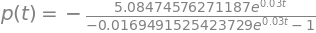

In [6]:
#Mostramos las soluciones
sol1

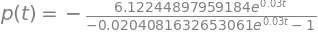

In [7]:
sol2

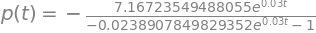

In [8]:
sol3

In [9]:
#Con los siguiente comandos podemos hacer que las soluciones sol1,sol2 y sol3
#puedan ser graficadas transformandolas en funciones
func1 = sp.lambdify(t,sol1.rhs,'numpy')
func2 = sp.lambdify(t,sol2.rhs,'numpy')
func3 = sp.lambdify(t,sol3.rhs,'numpy')

Documentación.

$$func2 = sp.lambdify(t, sol2.rhs, 'numpy')$$

Función: sp.lambdify convierte una expresión simbólica de SymPy en una función numérica que puede ser evaluada eficientemente. En este caso, es para convertir una solución simbólica en una función evaluable en términos de t usando NumPy.

$t:$ La variable independiente (normalmente el tiempo).
sol2.rhs: La parte derecha de la solución (rhs significa "right-hand side") de la ecuación diferencial.

$numpy:$ El backend que se utilizará para realizar los cálculos numéricos.

$Resultado:$ func2 es una función que toma valores de t y devuelve valores numéricos de p(t).

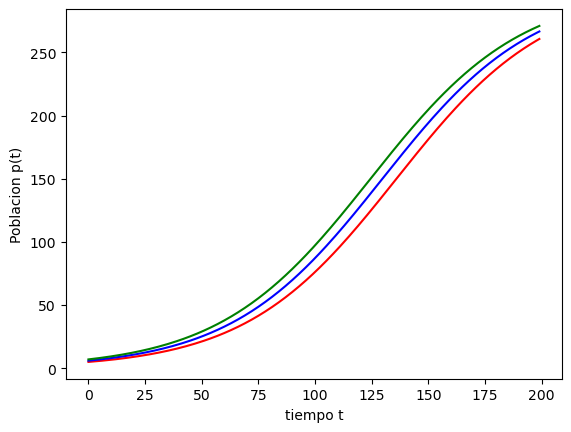

In [10]:
#Por ultimo graficamos las soluciones con el siguiente codigo
tt = np.arange(0,200,1) #Los primeros numeros represetna el intervalo 
                        #a tomar del dominio de la función 
pp1 = func1(tt)
pp2 = func2(tt) #Comando para dibujar las funciones
pp3 = func3(tt)

plt.plot(tt,pp1,'r',tt,pp2,'b',tt,pp3,'g')
plt.xlabel('tiempo t') #Comando para agregar nombres a los ejes
plt.ylabel('Poblacion p(t)')
plt.show() #Mostrar la grafica

Documentación.
$$pp3 = func2(tt)$$
Función: Aquí estás evaluando la función func2 en los valores de tt, que es un array de puntos de tiempo.

$tt:$ Una lista o array de valores de t donde deseas evaluar la solución.

$Resultado:$ pp3 contiene los valores evaluados de la función p(t) para los puntos en tt.

$$plt.plot(tt, pp1, 'r', tt, pp2, 'b', tt, pp3, 'g')$$

Función: plt.plot es parte de Matplotlib y genera una gráfica de líneas.

$tt:$ Los valores de la variable independiente (el eje x).

$pp1$, $pp2$, $pp3:$ Los valores de las funciones evaluadas en los puntos de tt, que representan el eje y para cada una de las funciones.

$'r'$, $'b'$, $'g'$: Los colores de las líneas en la gráfica (rojo, azul y verde).

In [11]:
#Este comando es utilizado para obtener algunos metodos de solucion
# de la ED y su clasificación
sp.classify_ode(ode)

('factorable',
 'separable',
 '1st_exact',
 'Bernoulli',
 '1st_rational_riccati',
 '1st_power_series',
 'lie_group',
 'separable_Integral',
 '1st_exact_Integral',
 'Bernoulli_Integral')

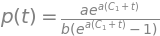

In [12]:
#Con el siguiente comando podemos verificar si la solución obtenida
#satisface la ED
sol=sp.dsolve(ode,p(t))
sol

In [13]:
#Si es verdadero el valor entonces nos arroja true
#  si no lo es arroja false
sp.checkodesol(ode,sol)

(True, 0)

### 2.Ecuación de Lagrange

$$y=2xy'+log(y')$$

In [14]:
#Definimos las variables
x=sp.symbols('x')
y=sp.Function('y')

In [15]:
#Importamos la funcion logaritmo para que la reconozca
from sympy import log 
#Agregamos  la ecuacion
ode2=sp.Eq(log(sp.Derivative(y(x),x))+2*x*sp.Derivative(y(x),x)-y(x),0)
#Le pedimos que clasifique la ecuación
sp.classify_ode(ode2)

('factorable', 'lie_group')

In [16]:
#Resuelve la ecuación
sol2 = sp.dsolve(ode2,y(x))

In [17]:
#Muestra la solucióm
sol2

Donde $W$ es la función de Lambert $W(z)$

### 3.Resonancia

$$y''+16y=8sen(4t)$$
con
$y(0)=1$ , $y'(0)=0$

In [18]:
from sympy import * #importamos el operador de multiplicación
t=sp.symbols('t')
y=sp.Function('y')

In [19]:
ode3=sp.Eq(sp.Derivative(y(t),t,t)+16*y(t)-8*sin(4*t),0)
sp.classify_ode(ode3)

('nth_linear_constant_coeff_undetermined_coefficients',
 'nth_linear_constant_coeff_variation_of_parameters',
 'nth_linear_constant_coeff_variation_of_parameters_Integral')

In [20]:
sol3 = sp.dsolve(ode3,y(t))

In [21]:
sol3

In [22]:
# Evaluando las condiciones iniciales
const=sp.solve([sol3.rhs.subs(t,0)-1, sol3.rhs.diff(t,1).subs(t,0)-0])
C1, C2 = sp.symbols('C1,C2')
sol3=sol3.subs(const)

Documentación.

$$const = sp.solve([sol3.rhs.subs(t, 0) - 1, sol3.rhs.diff(t, 1).subs(t, 0) - 0])$$
Función: sp.solve resuelve un sistema de ecuaciones simbólicas.

$[sol3.rhs.subs(t, 0) - 1, sol3.rhs.diff(t, 1).subs(t, 0) - 0]:$ Este es un conjunto de ecuaciones que se está resolviendo. La primera es que la solución en $t=0$ es igual a 1, y la segunda es que la derivada de la solución en $t=0$ es igual a $0$.

In [23]:
sol3

In [24]:
#Generamos el resultado anterior como función para graficar
func1 = sp.lambdify(t,sol3.rhs,'numpy')
import scipy
xx = np.arange(0,10,.1)
yy1 = func1(xx)

Documentación.

$$xx = np.arange(0, 10, .1)$$

Función: np.arange es una función de NumPy que genera un array de valores espaciados uniformemente.

$0:$ Valor inicial.

$10:$ Valor final (no incluido).

$.1:$ El espaciado entre los valores.

$Resultado:$ xx es un array con valores desde 0 hasta 9.9 con un paso de 0.1.

C:\Users\Javier\AppData\Local\Temp\ipykernel_15108\4142892128.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(xx,yy1,'r', color='green') #comando color para ambiar el color de la graf.


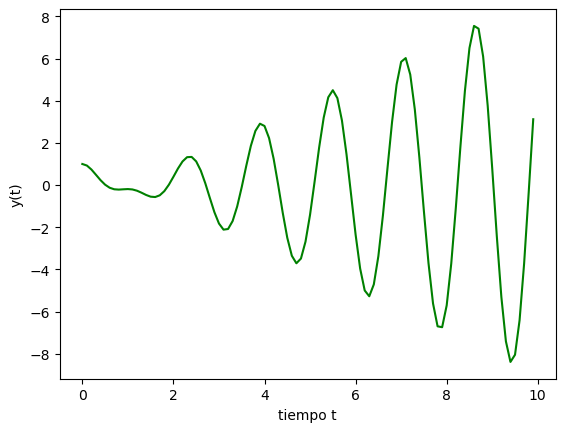

In [25]:
#Graficamos
plt.plot(xx,yy1,'r', color='green') #comando color para ambiar el color de la graf.
plt.xlabel('tiempo t') #Titulos de los ejes
plt.ylabel('y(t)')
plt.show()

### 4. Ecuación de 3er Orden

$$y'''-y''-y'+y=g(t)$$

In [26]:
#Definimos las variables
t=sp.symbols('t')
y=sp.Function('y')
g=sp.Function('g')

In [27]:
#Agregamos la ecuacion
ode4=sp.Eq(sp.Derivative(y(t),t,3)-sp.Derivative(y(t),t,t)-sp.Derivative(y(t),t)+y(t)-g(t),0)
#Aplicamos el comando para observar que clasificacion tiene
sp.classify_ode(ode4)

('factorable',
 'nth_linear_constant_coeff_variation_of_parameters',
 'nth_linear_constant_coeff_variation_of_parameters_Integral')

In [28]:
#Resolvemos la ecuación
sol4 = sp.dsolve(ode4,y(t))

In [29]:
#Mostramos el resultado
sol4

### 5. Una ecuación homogénea de Cauchy-Euler de cuarto orden

$$x^4y^{(4)}(x)+6x^3y^{(3)}(x)+9x^2y''(x)+3xy'(x)+y(x)=0$$

In [30]:
#Definimos las variables
x=sp.symbols('x')
y=sp.Function('y')

In [31]:
#Importamos el operador *
from sympy import *
#Agregamos la ED:
ode5=sp.Eq(x**4*sp.Derivative(y(x),x,4)+6*x*x*x*sp.Derivative(y(x),x,3)+ 9*x**2*sp.Derivative(y(x),x,2)+3*x*sp.Derivative(y(x),x)+y(x),0)

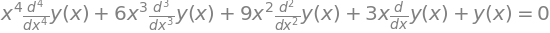

In [32]:
ode5

In [33]:
sol5=sp.dsolve(ode5,y(x))

In [34]:
sol5

In [35]:
#Verificamos si es un resultado para la ED:
sp.checkodesol(ode5,sol5)

(True, 0)

Si sabemos un cambio de variable adecuado que puede simplificar la ED, podemos agregar ese cambio de variable con el siguiente comando:


In [36]:
#un m´etodo de soluci´ on de las ecuaciones de Cauchy 
# Euler implica la substitucion y = x^n
n=sp.symbols('n')
eq=simplify(ode5.subs(y(x),x**n))

#Imprimimos la ecuación auxiliar:
factor(eq)

In [37]:
#Probemos el cambio de variable y=log(x)
from sympy import log
n1=sp.symbols('n1')
eq1=simplify(ode5.subs(y(x),log(x)))
factor(eq1)

Documentación:

$$n1 = sp.symbols('n1')$$

Función: sp.symbols define variables simbólicas en SymPy.

$'n1':$ El nombre de la variable simbólica que se está creando.

$Resultado:$ n1 es una variable simbólica que puedes usar en expresiones simbólicas.

### 6. Un problema de valor inicial con deltas de Dirac como fuentes

$$y''(t)-4y'(t)+4y(t)=3\delta(t-1)+\delta(t-2)$$
con
$$y(0)=1$$
$$y'(0)=1$$

In [38]:
#declaramos nuestras variables
t=sp.symbols('t')
y=sp.Function('y')

In [39]:
from sympy import *
#esciribimos la ED
ode6=sp.Eq(sp.Derivative(y(t),t,2)-4*sp.Derivative(y(t),t)+ 4*y(t),3*DiracDelta(t-1)+DiracDelta(t-2))

Documentación.

$$sp.Derivative(y(t), t, 2)$$

Función: sp.Derivative calcula la derivada de una función.

$y(t):$ Es la función de t para la cual se está calculando la derivada.

$t:$ Indica que estás derivando con respecto a la variable t.

$2:$ Indica que estás calculando la segunda derivada (derivada de segundo orden) de y(t) con respecto a t.

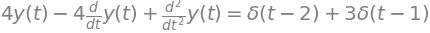

In [40]:
ode6

In [41]:
#resolvemos la ED
sol6 = sp.dsolve(ode6)

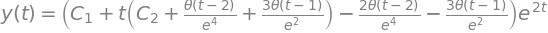

In [42]:
sol6

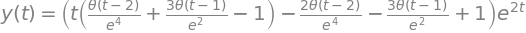

In [43]:
#Evaluamos las condiciones iniciales
constants=solve([sol6.rhs.subs(t,0)-1,sol6.rhs.diff(t,1).subs(t,0)-1])
#Resolvemos la ED con las condiciones iniciales
sol6.subs(constants)

### 7. Sistema masa-resorte:

$$mx''(t)+ke^{-\alpha t}x(t)=0$$

In [44]:
#Definimos las variables:
t=sp.symbols('t')
y=sp.Function('y')
m=sp.symbols('m')
k=sp.symbols('k')
a=sp.symbols('a')

In [45]:
#Escribimos la ED:
ode7=sp.Eq(m*sp.Derivative(y(t),t,t)+k*exp(-a*t)*y(t),0)
#Observamos que clasificacion tiene
sp.classify_ode(ode7)

('2nd_power_series_ordinary',)

In [46]:
#resolvemos la ED:
sol7=sp.dsolve(ode7,y(t))

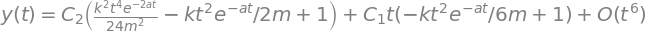

In [47]:
#mostramos la solucion obtenida¨:
sol7

### 8. Problema de valor inicial para un sistema de ecuaciones lineales

\begin{align*}
x'(t) &= 3x(t) - 18y(t), \quad x(0) = 0, \\
y'(t) &= 2x(t) + 9y(t), \quad y(0) = 1.
\end{align*}

In [48]:
#definimos las variables del sistema
from sympy import *
t = sp.symbols('t')
x, y = sp.symbols('x y', cls=Function)

Documentación:

$$x, y = sp.symbols('x y', cls=Function)$$

Esta funcíon crea funciones simbólicas $x$ y $y$ en lugar de variables simples, permitiendo que puedan ser diferenciadas, integradas o usadas en ecuaciones diferenciales con respecto a otras variables, como t.

In [49]:
#Con este comando agregamos un sistema de ecuaciones
eqs = [Eq(x(t).diff(t), 3*x(t)-18*y(t)), Eq(y(t).diff(t),2*x(t)+9*y(t))]

Documentación.

$$qs = [Eq(x(t).diff(t), 3*x(t) - 18*y(t)), Eq(y(t).diff(t), 2*x(t) + 9*y(t))]$$

$Función:$ Aquí defines un sistema de ecuaciones diferenciales ordinarias con SymPy.

$Eq(x(t).diff(t), 3*x(t) - 18*y(t)):$ Define una ecuación diferencial para x(t).

$Eq(y(t).diff(t), 2*x(t) + 9*y(t)):$ Define una ecuación diferencial para y(t).

$Resultado:$ eqs es una lista que contiene dos ecuaciones diferenciales ordinarias.

In [50]:
#Resolvemos el sistema
sol8=dsolve(eqs, [x(t), y(t)])

In [51]:
#mostramos el resultado
sol8

In [52]:
#Calculamos las constantes de los valores iniciales de un sistema
# de ecuaciones lineales con el siguiente codigo:
constants = solve((sol8[0].subs(t,0).subs(x(0),0),
sol8[1].subs(t,0).subs(y(0),1)),{C1,C2})
xsoln = expand(sol8[0].rhs.subs(constants))
ysoln = expand(sol8[1].rhs.subs(constants))


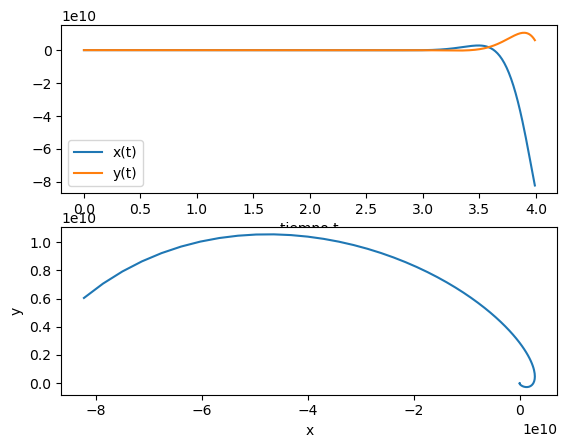

In [53]:
#Graficamos la función obtenida mediante los siguientes comandos
tt=np.arange(0,4,0.01)
funcxt=sp.lambdify(t,xsoln,'numpy')
funcyt=sp.lambdify(t,ysoln,'numpy')
xt=funcxt(tt)
yt=funcyt(tt)
#---------------------------------------
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('')
ax1.plot(tt,xt,tt,yt)
ax1.set(xlabel='tiempo t')
ax1.legend(['x(t)', 'y(t)'])
ax2.plot(xt, yt)
ax2.set(xlabel='x',ylabel='y')
plt.show()

### 9. Ecuación de Airy

$$y''(t)-ty(t)=0$$

In [54]:
#Declaramos las variables
t = sp.symbols('t')
y=sp.Function('y')

In [55]:
#Escribimos la ED:
ode9=sp.Eq(sp.Derivative(y(t),t,t)-t*y(t),0)

In [56]:
#Veamos que clasificacion tiene
sp.classify_ode(ode9)

('2nd_linear_airy', '2nd_power_series_ordinary')

In [57]:
#Resolvemos la ED
sol9=dsolve(ode9,y(t))

In [58]:
#mMostramos el resultado
sol9

Podemos obtener soluciones a estas ecuaciones a partir de series de potencias con los siguiente comandos

In [59]:
#Esta solución esta dada alrededor de t=0
sols9 = sp.dsolve(ode9,hint='2nd_power_series_ordinary')
constants=solve([sols9.rhs.subs(t,0)-1,sols9.rhs.diff(t,1).subs(t,0)-1])
ysol=expand(sols9.rhs.subs(constants))

In [60]:
ysol

Calculemos ahora una solucion de series de potencias centradas en $t=1$

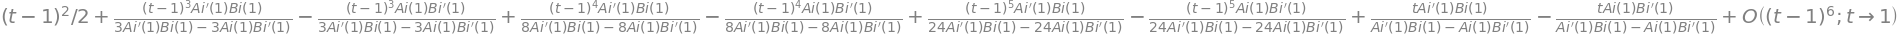

In [61]:
s9=simplify(series(sol9.rhs,t,1))
constants=solve([s9.subs(t,1)-1,s9.diff(t,1).subs(t,1)-1])
ss9=s9.subs(constants)
#Reducimos la ecuación a su maxima expresión
simplify(series(ss9,t,1,6))

### 10. Campo de direcciones de una ecuación diferencial

Para grficar el campo vectorial de una ecuación diferencial tomamos los siguientes comandos

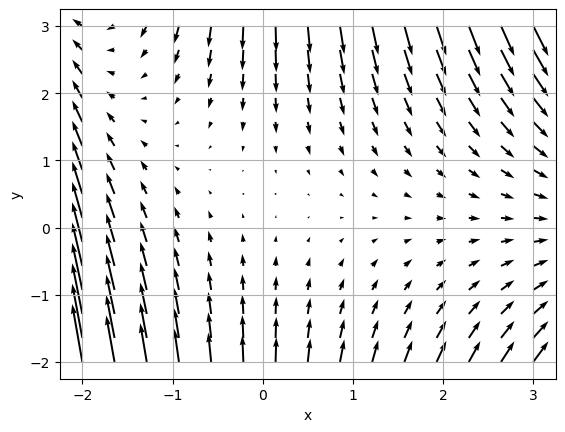

In [62]:
x,y = np.meshgrid(np.linspace(-2,3,15),np.linspace(-2,3,15))
plt.quiver(x,y,x,np.exp(-x)-2*y)
plt.grid('on')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Documentación:

$$x, y = np.meshgrid(np.linspace(-2, 3, 15), np.linspace(-2, 3, 15))$$

$Función:$ $np.$ crea dos matrices 2D a partir de dos vectores de valores. Estas matrices representan una grilla de puntos en el plano cartesiano (2D), lo cual es útil para evaluar funciones en una cuadrícula de valores.

$Argumentos:$ $np.linspace(-2, 3, 15)$ genera un conjunto de 15 puntos equidistantes entre -2 y 3. Lo hace dos veces, una para el eje x y otra para el eje y.

$$plt.quiver(x, y, x, np.exp(-x) - 2*y)$$

$Función:$ plt.quiver genera un campo de vectores en el plano. Dibuja flechas en cada punto de la grilla creada por x y y para representar la dirección y magnitud de un vector en cada punto.

Argumentos:

$x:$ Las coordenadas x de los puntos en los que se colocarán los vectores.

$y:$ Las coordenadas y de los puntos en los que se colocarán los vectores.

$np.exp(-x) - 2*y:$ El componente en la dirección del eje y de los vectores. Este término define cómo varía el vector en la dirección vertical. La función exponencial  $exp(−𝑥)$ decae a medida que $x$ aumenta
y la parte $-2*y$ afecta el vector en función de la coordenada vertical $y$.

Resultado: $plt.quiver$ dibuja un campo vectorial en los puntos de la cuadrícula, donde cada vector tiene componentes $x$ (horizontal) y $np.exp(-x) - 2*y (vertical).$ Las flechas representan la dirección y magnitud de los vectores en cada punto de la grilla.

$$plt.grid('on')$$
Función: $plt.grid('on')$ activa la visualización de una rejilla sobre la gráfica, facilitando la interpretación del campo vectorial.

Resultado: Se muestra una cuadrícula de líneas que coinciden con los valores de las coordenadas.

 ### 11. Un sistema no lineal (depredador-presa)

\begin{align*}
x'(t) &= x(t)(1-x(t)-y(t)) \\
y'(t) &= y(t)(0.75-0.5x(t)-y(t))
\end{align*}

En este ejemplo además de visualizar las curvas integrales del sistema,vamos a analizar de forma analitica los puntos
 criticos y clasificarlos(como nodos inestables,asintoticamente estable o puntos silla).

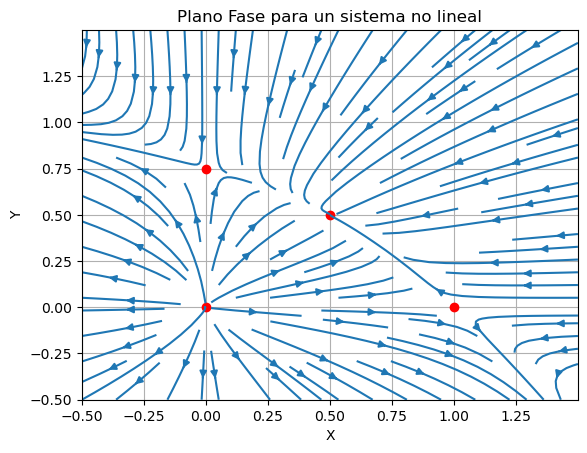

In [63]:
import numpy as np
import matplotlib.pyplot as plt
nodos = np.array([[0, 0, 1, 0.5], [0, 0.75, 0, 0.5]])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plano Fase para un sistema no lineal')
plt.plot(nodos[0], nodos[1], 'ro')
xvalues,yvalues=np.meshgrid(np.arange(-.5,1.5,0.001), np.arange(-0.5,1.5,0.001))
xdot = xvalues*(1-xvalues-yvalues)
ydot = yvalues*(0.75-0.5*xvalues-yvalues)
plt.streamplot(xvalues, yvalues, xdot, ydot)

plt.grid()
plt.show()

In [64]:
#Se calculan los puntos citicos
import sympy as sp
#x, y = sp.symbols('x y')
#pts=sp.solve([x*(1-x-y),y*(0.75-0.5*x-y)],{x,y})
#pts[0]
 #{x: 0.0, y: 0.0}
#pts[1]
 #{x: 0.0, y: 0.750000000000000}
#pts[2]
 #{x: 0.500000000000000, y: 0.500000000000000}
#pts[3]
 #{x: 1.00000000000000, y: 0.0}
x, y = sp.symbols('x y')
pts = sp.solve([x*(1-x-y), y*(0.75-0.5*x-y)], {x, y})

# Imprimir los puntos críticos
for i, pt in enumerate(pts):
    print(f"pts[{i}] = {pt}")


pts[0] = {x: 0.0, y: 0.0}
pts[1] = {x: 0.0, y: 0.750000000000000}
pts[2] = {x: 0.500000000000000, y: 0.500000000000000}
pts[3] = {x: 1.00000000000000, y: 0.0}


In [65]:
#Con el siguiente comando se calcula la matriz Jacobiana del sistema
X=sp.Matrix([x*(1-x-y),y*(0.75-0.5*x-y)])
Y=sp.Matrix([x,y])
A=X.jacobian(Y)

Posteriormente, se evalua la matriz Jacobiana en los puntos criticos y se calculan los valores propios para clasificar los puntos criticos

In [66]:
 A.subs(pts[0]).eigenvects()
 [(0.750000000000000, 1, [Matrix([
 [ 0],
 [1.0]])]), (1.00000000000000, 1, [Matrix([
 [1.0],
 [ 0]])])]
 A.subs(pts[1]).eigenvects()
 [(-0.750000000000000, 1, [Matrix([
 [ 0],
 [1.0]])]), (0.250000000000000, 1, [Matrix([
 [-2.66666666666667],
 [
 1.0]])])]
 A.subs(pts[2]).eigenvects()
 [(-0.853553390593274, 1, [Matrix([
 [1.4142135623731],
 [
 1.0]])]), (-0.146446609406726, 1, [Matrix([
 [-1.4142135623731],
 [
 1.0]])])]
 A.subs(pts[3]).eigenvects()
 [(-1.00000000000000, 1, [Matrix([
 [1.0],
 [ 0]])]), (0.250000000000000, 1, [Matrix([
 [-0.8],
 [ 1.0]])])]

⎡⎛         ⎡⎡1.0⎤⎤⎞  ⎛         ⎡⎡-0.8⎤⎤⎞⎤
⎢⎜-1.0, 1, ⎢⎢   ⎥⎥⎟, ⎜0.25, 1, ⎢⎢    ⎥⎥⎟⎥
⎣⎝         ⎣⎣ 0 ⎦⎦⎠  ⎝         ⎣⎣1.0 ⎦⎦⎠⎦

### 12.  Problema de valor inicial para una ecuación no lineal (solución numérica)


\begin{align*}
y'(t)=sen(y^2(t)), \quad y(0) = 1
\end{align*}

In [67]:
#Importamos las siguientes librerias
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
sin = np.sin

Se define la función que se encuentra en el lado derecho de la ED $dy/dt=f(y,t)$

In [68]:
def model(y,t):
    dydt=sin(y*y)
    return dydt

y0 = 1
t=np.linspace(0,20)

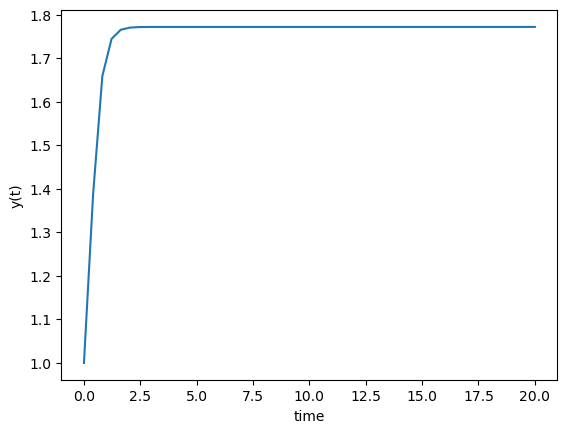

In [69]:
#Graficamos la función con los siguientes comandos:
y=odeint(model,y0,t)
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()